### Understanding HDB Resale Prices

Singapore has the second most housing prices in the world, second only to Hong Kong, even though about 85% of us live in HDBs. This implies that although provide by out government, many HDBs can still be very expensive.

The purpose of this project is to better understand the drivers HDB Resale prices in Singapore. 

First we download the HDB resale housing data from data.gov.sg. In thise section, we do some simple analysis, and data cleaning. After the data has been cleaned more, we can move on exploratory data analysis to yield better insights.

In [1]:
import numpy as np
from numpy.random import randn
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_theme()
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 50)

In [2]:
%autosave 300

Autosaving every 300 seconds


In [3]:
price1=pd.read_csv('data/resale-flat-prices-based-on-approval-date-1990-1999.csv')
price2=pd.read_csv('data/resale-flat-prices-based-on-approval-date-2000-feb-2012.csv')
price3=pd.read_csv('data/resale-flat-prices-based-on-registration-date-from-mar-2012-to-dec-2014.csv')
price4=pd.read_csv('data/resale-flat-prices-based-on-registration-date-from-jan-2015-to-dec-2016.csv')
price5=pd.read_csv('data/resale-flat-prices-based-on-registration-date-from-jan-2017-onwards.csv')

In [9]:
price1.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price
0,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000
1,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000
2,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000
3,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000
4,1990-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200


In [10]:
price2.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price
0,2000-01,ANG MO KIO,3 ROOM,170,ANG MO KIO AVE 4,07 TO 09,69.0,Improved,1986,147000.0
1,2000-01,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,04 TO 06,61.0,Improved,1986,144000.0
2,2000-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,07 TO 09,73.0,New Generation,1976,159000.0
3,2000-01,ANG MO KIO,3 ROOM,215,ANG MO KIO AVE 1,07 TO 09,73.0,New Generation,1976,167000.0
4,2000-01,ANG MO KIO,3 ROOM,218,ANG MO KIO AVE 1,07 TO 09,67.0,New Generation,1976,163000.0


In [11]:
price3.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price
0,2012-03,ANG MO KIO,2 ROOM,172,ANG MO KIO AVE 4,06 TO 10,45.0,Improved,1986,250000.0
1,2012-03,ANG MO KIO,2 ROOM,510,ANG MO KIO AVE 8,01 TO 05,44.0,Improved,1980,265000.0
2,2012-03,ANG MO KIO,3 ROOM,610,ANG MO KIO AVE 4,06 TO 10,68.0,New Generation,1980,315000.0
3,2012-03,ANG MO KIO,3 ROOM,474,ANG MO KIO AVE 10,01 TO 05,67.0,New Generation,1984,320000.0
4,2012-03,ANG MO KIO,3 ROOM,604,ANG MO KIO AVE 5,06 TO 10,67.0,New Generation,1980,321000.0


In [12]:
price4.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2015-01,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,07 TO 09,60.0,Improved,1986,70,255000.0
1,2015-01,ANG MO KIO,3 ROOM,541,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1981,65,275000.0
2,2015-01,ANG MO KIO,3 ROOM,163,ANG MO KIO AVE 4,01 TO 03,69.0,New Generation,1980,64,285000.0
3,2015-01,ANG MO KIO,3 ROOM,446,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1979,63,290000.0
4,2015-01,ANG MO KIO,3 ROOM,557,ANG MO KIO AVE 10,07 TO 09,68.0,New Generation,1980,64,290000.0


In [13]:
price5.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2017-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61 years 04 months,232000.0
1,2017-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,60 years 07 months,250000.0
2,2017-01,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,262000.0
3,2017-01,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1980,62 years 01 month,265000.0
4,2017-01,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,265000.0


In [4]:
##concat all data files into one

df = pd.concat([price5, price4, price3, price2, price1])
df.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2017-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61 years 04 months,232000.0
1,2017-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,60 years 07 months,250000.0
2,2017-01,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,262000.0
3,2017-01,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1980,62 years 01 month,265000.0
4,2017-01,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,265000.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 840354 entries, 0 to 287199
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                840354 non-null  object 
 1   town                 840354 non-null  object 
 2   flat_type            840354 non-null  object 
 3   block                840354 non-null  object 
 4   street_name          840354 non-null  object 
 5   storey_range         840354 non-null  object 
 6   floor_area_sqm       840354 non-null  float64
 7   flat_model           840354 non-null  object 
 8   lease_commence_date  840354 non-null  int64  
 9   remaining_lease      131300 non-null  object 
 10  resale_price         840354 non-null  float64
dtypes: float64(2), int64(1), object(8)
memory usage: 51.3+ MB


In [6]:
##Chech percentage of NA this column has 
df['remaining_lease'].isnull().mean()

0.8437563217405998

## Data Cleaning
We need to transform some columns before we can do the analysis

##### Transfrom month to datetime, Obtain year column


In [7]:
df['date'] = pd.to_datetime(df['month'])
df['year'] = pd.DatetimeIndex(df['month']).year
df.drop('month', axis=1, inplace=True)

In [8]:
##reorder the columns
df = df[[
    'date','year','town',
 'flat_type',
 'block',
 'street_name',
 'storey_range',
 'floor_area_sqm',
 'flat_model',
 'lease_commence_date',
 'remaining_lease',
 'resale_price']]

In [9]:
df.head()

,date,year,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2017-01-01,2017,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61 years 04 months,232000.0
1,2017-01-01,2017,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,60 years 07 months,250000.0
2,2017-01-01,2017,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,262000.0
3,2017-01-01,2017,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1980,62 years 01 month,265000.0
4,2017-01-01,2017,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,265000.0


In [10]:
## Order the dataframe by date ascending
df = df.sort_values(by='date',ascending=1)
df.reset_index(inplace = True)
df.drop('index', axis=1, inplace = True)

#### Clean up Duplicates in flat_type, flat_model

In [11]:
##Clean Flat Type
df['flat_type'].value_counts()
## We shall combine the two duplicate rows 'Multi Generation' and 'Multi-Generation'

4 ROOM              315016
3 ROOM              275565
5 ROOM              174127
EXECUTIVE            63803
2 ROOM               10053
1 ROOM                1279
MULTI GENERATION       279
MULTI-GENERATION       232
Name: flat_type, dtype: int64

In [12]:
df['flat_type'] = df['flat_type'].str.replace('MULTI-GENERATION', 'MULTI GENERATION')
df['flat_type'].value_counts()

4 ROOM              315016
3 ROOM              275565
5 ROOM              174127
EXECUTIVE            63803
2 ROOM               10053
1 ROOM                1279
MULTI GENERATION       511
Name: flat_type, dtype: int64

In [13]:
## Clean flat_model
df['flat_model'].value_counts()

Model A                   162507
Improved                  147266
New Generation            100275
NEW GENERATION             78898
IMPROVED                   73593
MODEL A                    70381
Premium Apartment          36710
Simplified                 31147
SIMPLIFIED                 23258
Standard                   22890
Apartment                  22679
STANDARD                   17375
Maisonette                 15157
MAISONETTE                 12215
APARTMENT                   9901
Model A2                    9224
DBSS                        1941
Adjoined flat               1111
MODEL A-MAISONETTE           982
Model A-Maisonette           938
Terrace                      405
Type S1                      292
MULTI GENERATION             279
TERRACE                      247
Multi Generation             232
Type S2                      146
Premium Maisonette            83
Improved-Maisonette           72
Premium Apartment Loft        57
IMPROVED-MAISONETTE           44
2-room    

In [14]:
df['flat_model'] = df['flat_model'].str.lower()
df['flat_model'] = df['flat_model'].apply(lambda x: x.title())

In [15]:
df['flat_model'].value_counts()

Model A                   232888
Improved                  220859
New Generation            179173
Simplified                 54405
Standard                   40265
Premium Apartment          36716
Apartment                  32580
Maisonette                 27372
Model A2                    9224
Dbss                        1941
Model A-Maisonette          1920
Adjoined Flat               1111
Terrace                      652
Multi Generation             511
Type S1                      292
Type S2                      146
Improved-Maisonette          116
Premium Maisonette            83
Premium Apartment Loft        57
2-Room                        43
Name: flat_model, dtype: int64

Some background information on the different types of Flat Models: (credit to teyang lau)

1. Standard: (1/2/3/4/5-room). 1960s HDB. Had WC and shower in same room. 5-room Standard were introduced in 1974.
2. Improved: (1/2/3/4/5-room). Introduced in 1966, the 3/4-room having separate WC and shower, they also featured void decks. 5-room Improved were introduced in 1974.
3. New Generation: Started first in 1975, New Generation flats can be 3-Room (67 / 82 sqm) or 4-Room (92 sqm), featuring en-suite toilet for master bedroom, with pedestal type Water Closet, plus store room.
4. Model A: Introduced in 1981: 3-Room (75 sqm), 4-Room (105 sqm), 5-Room (135 sqm), 5-Room Maisonette (139 sqm)
5. Model A2: Smaller units of Model A. e.g., 4-Room Model A2 (90 sqm)
6. Simplified: Introduced in 1984: 3-Room (64 sqm), 4-Room (84 sqm)
7. Multi Generation: 3Gen flats designed to meet the needs of multi-generation families.
8. Maisonette: AKA Model A Maisonette — 2 storeys HDB flat
9. Premium Apartment: Introduced somewhere during 1990s, featuring better quality finishes, you get them in ready-to-move condition, with flooring, kitchen cabinets, built-in wardrobes
10. Executive Maisonette: More premium version of Model A Maisonettes. These units are no longer being built after being replaced by the Executive Condominium (EC) scheme in 1995
11. Executive Apartment: Executive Apartment / Maisonette (146-150 sqm) were introduced in 1983 and replaced 5-Room Model A flats, in addition of the 3-bedroom and separate living/dining found in 5A flats, EA and EM feature an utility/maid room. 80% of Executive units were Maisonettes and 20% were Apartments.
12. DBBS: DBSS flats are public apartments built under the Housing & Development Board's (HDB) short-lived Design, Build and Sell Scheme (DBSS) from 2005 to 2012. They are a unique (and premium) breed of HDB flats in Singapore, which are built by private developers.DBSS flats are known for their high prices: In fact, many of the million-dollar HDB transactions involved 5-room DBSS flats in sought-after locations.
13. Adjoined Flat: Large HDB flats which are combined from 2 HDB flats
14. Terrace: HDB terrace flats built before HDB, without realizing Singapore's land constraint. Discontinued
15. Type S1S2: apartments at The Pinnacle@Duxton are classified as "S" or Special apartments in view of its historical significance and award-winning design. For application of HDB policies, S1 and S2 apartments will be treated as 4-room and 5-room flats respectively
16. 2-room: Most likely refers to 2-room flexi where there is 1 bedroom and 1 common area

#### Uncaps the Town column

In [16]:
df['town'] = df['town'].str.lower()
df['town'] = df['town'].apply(lambda x: x.title())
##Make it more readable. 

#### Storey_range - might need to convert to a number in the middle of range

In [17]:
df['storey_range'].value_counts()

04 TO 06    212876
07 TO 09    191956
01 TO 03    171419
10 TO 12    162698
13 TO 15     53537
16 TO 18     20107
19 TO 21      9713
22 TO 24      6276
01 TO 05      2700
25 TO 27      2667
06 TO 10      2474
11 TO 15      1259
28 TO 30      1126
31 TO 33       319
34 TO 36       309
37 TO 39       301
16 TO 20       265
40 TO 42       148
21 TO 25        92
26 TO 30        39
46 TO 48        28
43 TO 45        26
49 TO 51        10
36 TO 40         7
31 TO 35         2
Name: storey_range, dtype: int64

### Remaining Lease Column
- Convert it from years and months to just years. Should be a good approx. Whole number easier to analyse

In [18]:
##convert remaining lease from years and months to years only. 
df['remaining_lease'] = df['remaining_lease'].str[:2]


<AxesSubplot:xlabel='remaining_lease'>

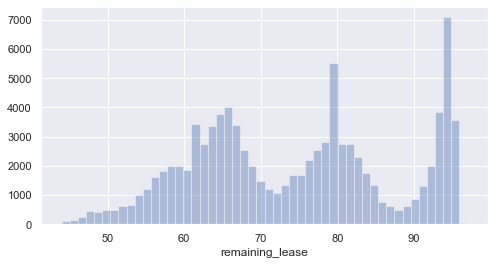

In [19]:
## Quick check on remaining_lease distribution. 
plt.figure(figsize =(8,4))
sns.distplot(df['remaining_lease'],kde=False, bins =50)

### Outliers

<AxesSubplot:title={'center':'Distribution of HDB Floor Area'}, xlabel='floor_area_sqm'>

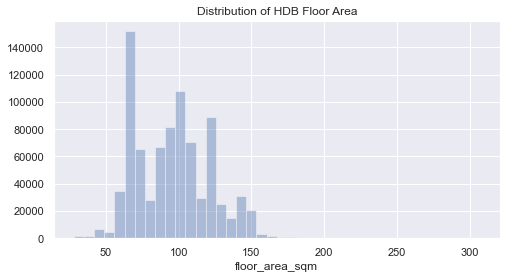

In [20]:
##Quick check at floor area column distribution
plt.figure(figsize =(8,4))
plt.title('Distribution of HDB Floor Area') 
sns.distplot(df['floor_area_sqm'],kde=False,bins=40)

<AxesSubplot:ylabel='floor_area_sqm'>

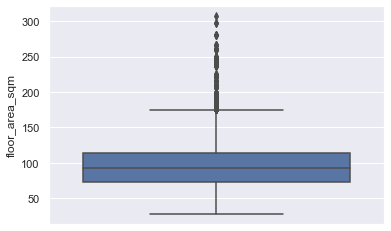

In [21]:
##plot boxplot to further check for outliers
sns.boxplot(y='floor_area_sqm', data =df)

In [22]:
## We see that most of the outliers are above 200 square meter. lets take a closer look at these points.

In [23]:
df[df['floor_area_sqm']>200]['flat_model'].value_counts()

Terrace               61
Maisonette            14
Premium Maisonette     7
Apartment              4
Adjoined Flat          1
Name: flat_model, dtype: int64

In [35]:
df[df['floor_area_sqm']>200]['flat_type'].value_counts()

3 ROOM       61
EXECUTIVE    25
5 ROOM        1
Name: flat_type, dtype: int64

These mostly belong to special HDB types. So not considered to be outliers.

#### Lease Commence Year

<AxesSubplot:title={'center':'Distribution of Lease Commencement Year'}, xlabel='lease_commence_date'>

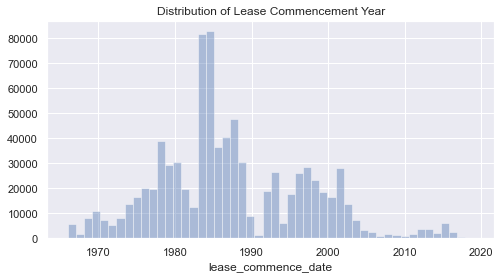

In [24]:
##quick check at Lease_commence_year distribution
bins = df['lease_commence_date'].max() - df['lease_commence_date'].min()
plt.figure(figsize =(8,4))
plt.title('Distribution of Lease Commencement Year') 
sns.distplot(df['lease_commence_date'], kde =False)

### Adjust Resale Price based on CPI

We use real price so we can compare the value of HDBs over different time periods.

CPI for housing and utilities taken from https://www.singstat.gov.sg/find-data/search-by-theme/economy/prices-and-price-indices/latest-data



In [25]:
cpi=pd.read_csv('data/CPI.csv')
cpi.head()

,month,cpi
0,1961 Jan,26.553
1,1961 Feb,26.669
2,1961 Mar,26.553
3,1961 Apr,26.650
4,1961 May,26.728


In [26]:
cpi['month'] = pd.to_datetime(cpi['month'], format='%Y %b')
cpi.rename(columns={'month':'date'}, inplace =True)
df=df.merge(cpi, on='date', how='left')
df['real_price'] = (df['resale_price']/df['cpi'])*100

In [27]:
df.head(2)

,date,year,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,cpi,real_price
0,1990-01-01,1990,Ang Mo Kio,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,Improved,1977,NaN,9000.0,60.894,14779.781259
1,1990-01-01,1990,Kallang/Whampoa,3 ROOM,28,JLN BAHAGIA,01 TO 03,56.0,Standard,1971,NaN,26000.0,60.894,42697.145860


#### Create a Price per Square Foot column
Might be a useful measure of price.

In [28]:
df['Price_per_SF'] = df['real_price']/df['floor_area_sqm']

<AxesSubplot:title={'center':'Distribution of Price per Square Foot'}, xlabel='Price_per_SF'>

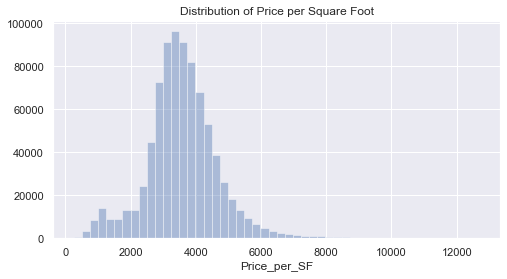

In [29]:
plt.figure(figsize =(8,4))
plt.title('Distribution of Price per Square Foot') 
sns.distplot(df['Price_per_SF'], kde =False)

In [30]:
df_backup1 = df.copy()

### Fill in missing Lease remaining years

In [31]:
df['remaining_lease'].isnull().sum()

746207

In [32]:
df['remaining_lease'].fillna(df['lease_commence_date'] + 99 - df['year'], inplace = True)

In [33]:
df['remaining_lease'].isnull().sum()

0

<AxesSubplot:xlabel='remaining_lease'>

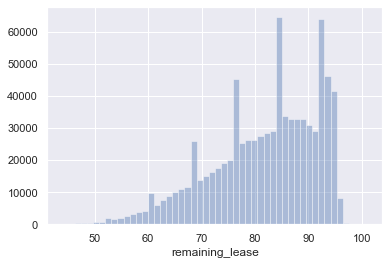

In [41]:
##quick check of the distribution of remaining_lease
sns.distplot(df['remaining_lease'], kde =False)

### Exploratory Data Analysis

Now that we've cleaned up the data, we can perform some preliminary analysis here. See how the price is correlated to each individual factor.


In [5]:
##Output file to be used for feature engineering

df.to_csv('HDB_prices_v2.csv')

NameError: name 'df' is not defined